# Problem 2(b)

2. Now, neglect the grid lines in the above problem. Find the trajectory from A (x,y,θ) = (3,15,0) to B
(x,y,θ) = (23,1,0) for the following system

$x = v cos θ $

$y = v sin θ $

$θ = u1 $
 
$v = u2 $
 
where θ is the angle with respect to the x axis, u1,u2 ∈ [−1,1]. You may neglect the dimension of the
car.

(b) Use the potential function method. (You may show only partial result for this.)

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [76]:
# Given constants
occ_map = np.array(
    [
        [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
    ]
)
map_height = occ_map.shape[0]
map_width = occ_map.shape[1]
start_coord = (2.5, 14.5)
goal_coord = (22.5, 0.5)

MAX_POTENTIAL = 1

In [77]:
def is_occupied(x, y):
    if x <= 0 or x >= map_width or y <= 0 or y >= map_height:
        return True
    return occ_map[int(map_height - y), int(x)] == 1

In [78]:
def goal_potential(x, y):
    return (
        0.05
        * MAX_POTENTIAL
        * np.sqrt((x - goal_coord[0]) ** 2 + (y - goal_coord[1]) ** 2)
    )


In [79]:
def obstacle_potential(x, y, a=5):
    if is_occupied(x, y):
        return MAX_POTENTIAL
    min_dist_to_obstacle = np.inf
    for i in range(map_width):
        for j in range(map_height):
            if is_occupied(i, j):
                dist = np.sqrt((x - i) ** 2 + (y - j) ** 2)
                if dist < min_dist_to_obstacle:
                    min_dist_to_obstacle = dist
    return MAX_POTENTIAL * np.exp(-(min_dist_to_obstacle-1) * a)
    # return scale * min((1/min_dist_to_obstacle - 1/0.5) ** 2,MAX_POTENTIAL)

In [80]:
def total_potential(x, y, scale=1):
    return obstacle_potential(x, y) + goal_potential(x, y)

In [81]:
def plot_potential_field_3d():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    x = np.arange(0, map_width, 0.1)
    y = np.arange(0, map_height, 0.1)

    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)
    print(x.size, y.size, Z.shape)
    for i, a in enumerate(x):
        for j, b in enumerate(y):
            Z[j, i] = total_potential(a, b)

    surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.cividis)

    # Plotting the 3D surface
    surf = ax.plot_surface(X, Y, Z, cmap="viridis", edgecolor="none")
    ax.set_title("3D Potential Field")
    ax.set_xlabel("X coordinate")
    ax.set_ylabel("Y coordinate")
    ax.set_zlabel("Potential")
    fig.colorbar(
        surf, shrink=0.5, aspect=5
    )  # Add a color bar to indicate potential values

    # Plot start and goal points
    ax.scatter(
        start_coord[0],
        start_coord[1],
        total_potential(start_coord[0], start_coord[1]),
        color="g",
        s=100,
        label="Start",
    )
    ax.scatter(
        goal_coord[0],
        goal_coord[1],
        total_potential(goal_coord[0], goal_coord[1]),
        color="b",
        s=100,
        label="Goal",
    )

    plt.legend()
    plt.show()

In [82]:
def gradient(x, y, scale=1):
    delta = 0.01
    dx = (
        total_potential(x + delta, y, scale) - total_potential(x - delta, y, scale)
    ) / (2 * delta)
    dy = (
        total_potential(x, y + delta, scale) - total_potential(x, y - delta, scale)
    ) / (2 * delta)
    return dx, dy

In [86]:
def path_planning(max_step=500):
    step = 0
    path = [start_coord]
    x, y = start_coord
    while np.sqrt((x - goal_coord[0]) ** 2 + (y - goal_coord[1]) ** 2) > 0.1:
        if step > max_step:
            print("Max step reached, finishing path planning")
            break
        if x <= 0 or x >= map_width or y <= 0 or y >= map_height:
            print("Out of map, finishing path planning at step ", step)
            break
        dx, dy = gradient(x, y)
        x = x - 0.5 * min(dx, 10)
        y = y - 0.5 * min(dy, 10)
        path.append((x, y))
        step += 1
    return np.array(path)

In [87]:

def plot_occupancy_map_and_path(path):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_aspect("equal")
    ax.margins(0)
    # Display the occupancy grid
    for y in range(map_height):
        for x in range(map_width):
            if occ_map[map_height - 1 - y][x] == 1:
                # Adding a rectangle for each occupied cell
                ax.add_patch(patches.Rectangle((x, y), 1, 1, color="black"))

    ax.plot(path[:, 0], path[:, 1], "-")
    ax.plot(path[0, 0], path[0, 1], "go", label="Start")  # Start point
    ax.plot(path[-1, 0], path[-1, 1], "bx", label="Goal")  # End point

    # Adding labels and a title for clarity
    ax.set_title("Occupancy Map")
    ax.set_xlabel("X coordinate")
    ax.set_ylabel("Y coordinate")

    ax.set_xticks(np.arange(0, map_width, 1))
    ax.set_yticks(np.arange(0, map_height, 1))
    plt.show()

Max step reached, finishing path planning


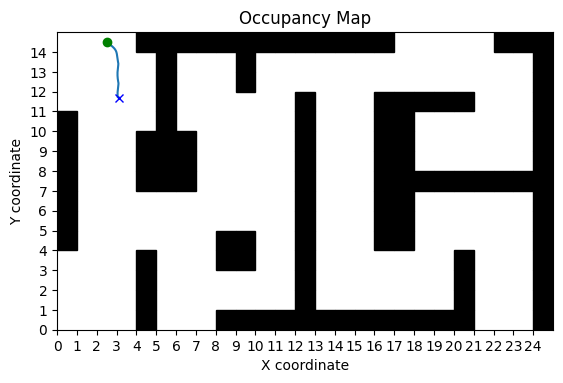

In [88]:
path = path_planning()
plot_occupancy_map_and_path(path)